#**Exponential smoothing**



##  install these libraries using pip:



In [1]:
%%capture
!pip install pandas matplotlib

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing

## Loading dataset

In [73]:
df = pd.read_csv('traffic.csv', parse_dates=['DateTime'], index_col='DateTime')
df.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [74]:
df = df.iloc[:500]

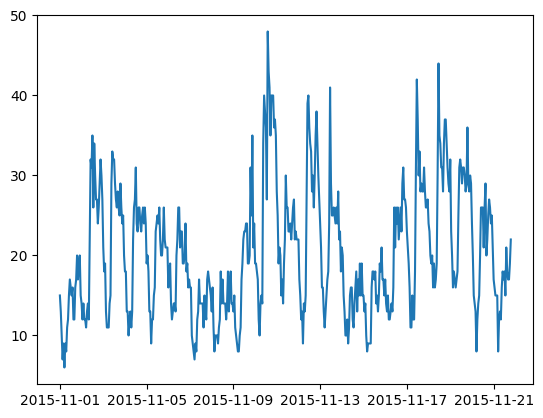

In [75]:
plt.plot(df['Vehicles'])
plt.show()

In [76]:
df2 = df['Vehicles']

## Visualizing the data





#**Single Exponential smoothing**





In [77]:
model = SimpleExpSmoothing(df2)
model_single_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions





In [78]:
forecast_single = model_single_fit.forecast(6)
print(forecast_single)

2015-11-21 20:00:00    21.873341
2015-11-21 21:00:00    21.873341
2015-11-21 22:00:00    21.873341
2015-11-21 23:00:00    21.873341
2015-11-22 00:00:00    21.873341
2015-11-22 01:00:00    21.873341
Freq: H, dtype: float64


## Visualize Single Exponential Smoothing




In [79]:
forecast_single = model_single_fit.forecast(40)

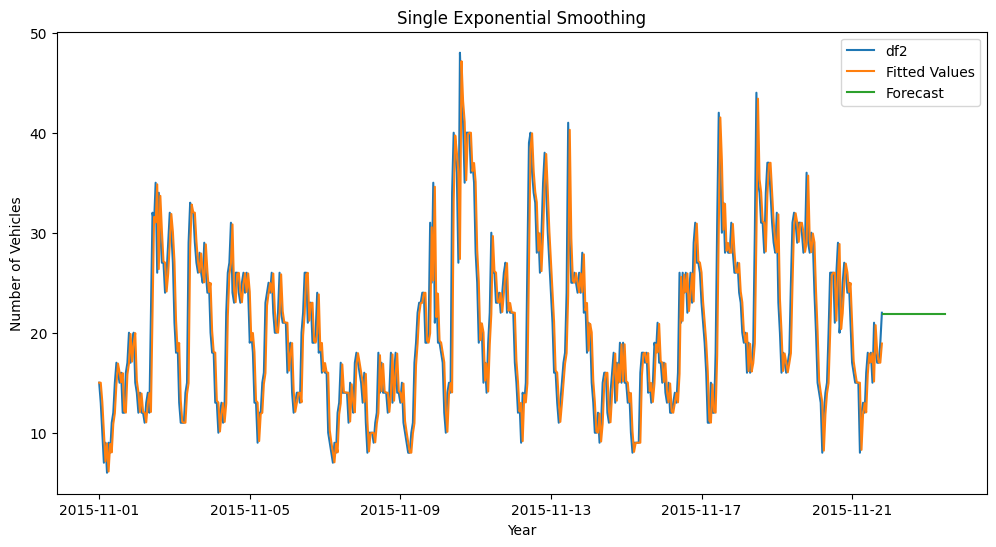

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(df2, label='df2')
plt.plot(model_single_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_single, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Single Exponential Smoothing')
plt.legend()
plt.show()

#**Double Exponential Smoothing**




In [81]:
from statsmodels.tsa.api import Holt

model_double = Holt(df2)
model_double_fit = model_double.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [82]:
forecast_double = model_double_fit.forecast(6)
print(forecast_double)


2015-11-21 20:00:00    21.927524
2015-11-21 21:00:00    21.938688
2015-11-21 22:00:00    21.949853
2015-11-21 23:00:00    21.961018
2015-11-22 00:00:00    21.972183
2015-11-22 01:00:00    21.983348
Freq: H, dtype: float64


## Visualize Double Exponential Smoothing




In [83]:
forecast_double = model_double_fit.forecast(40)

In [84]:
model_triple = ExponentialSmoothing(df2, trend='add', seasonal='add', seasonal_periods=12)  # Adjust parameters as needed
model_triple_fit = model_triple.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


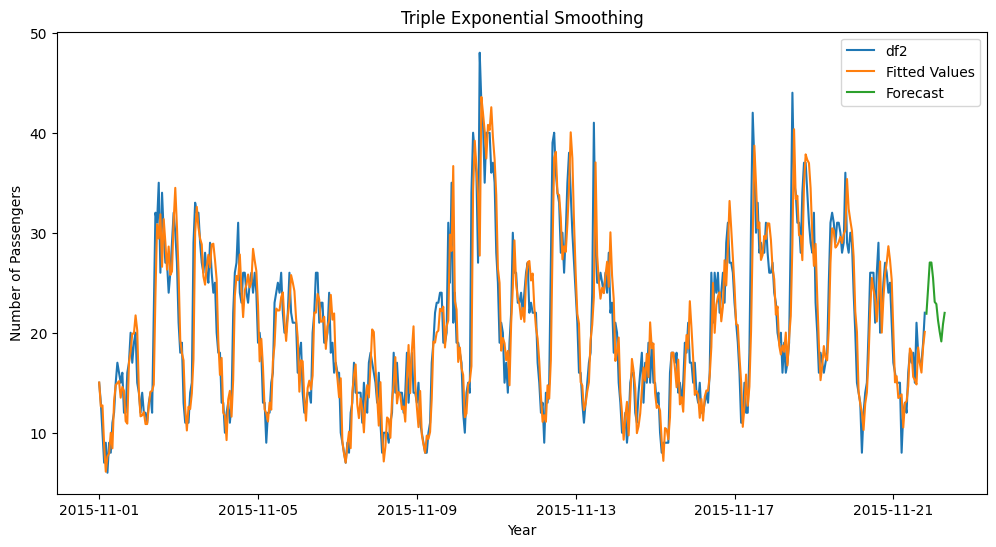

In [85]:
plt.figure(figsize=(12, 6))
forecast_triple = model_triple_fit.forecast(steps=12)  # Adjust the number of steps as needed
plt.plot(df2, label='df2')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()


#**Holt-Winter’s Seasonal Smoothing**






In [93]:
# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    df2, seasonal_periods=12, trend='add', seasonal='add')

# Fit the model to the data
model_triple_fit = model_triple.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [94]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)

2015-11-21 20:00:00    21.899819
2015-11-21 21:00:00    24.411694
2015-11-21 22:00:00    27.021475
2015-11-21 23:00:00    27.021718
2015-11-22 00:00:00    25.460868
2015-11-22 01:00:00    23.080138
Freq: H, dtype: float64


## Visualize Triple Exponential Smoothing




In [95]:
forecast_triple = model_triple_fit.forecast(40)

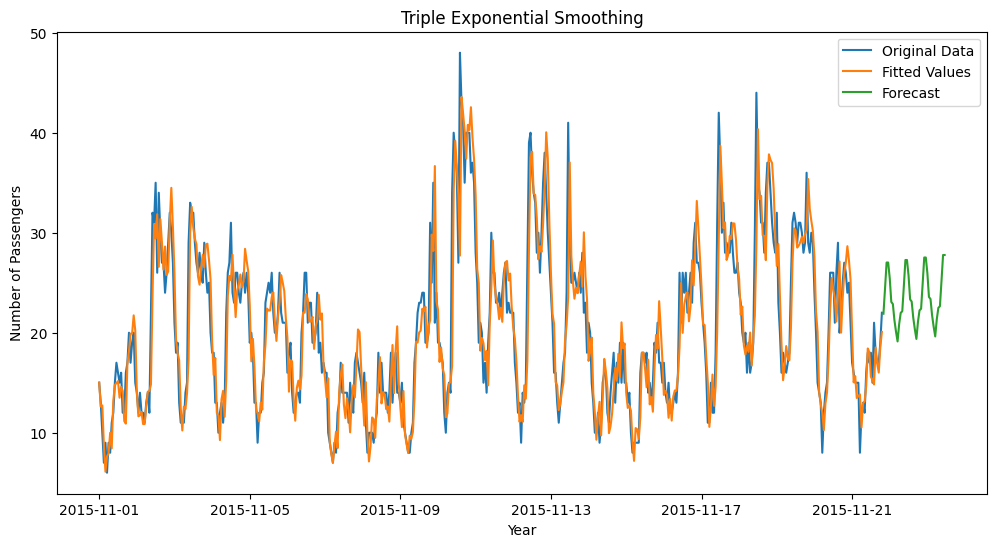

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(df2, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()

##**Well done :)**